# Bank Marketing with Machine Learning

## Introduction

## Why Machine Learning in Bank Marketing?

Marketing to customers has always been a crucial avenue on the success of banking institutions. With the inception of machine learning, reaching out to specific demographics has been revolutionized by using data and analytics to provide detailed drivers to which customers would buy or subscribe to a financial product. In this project on bank marketing with machine learning, we will dive into how data analytics was used to change the norm of making phone calls to potential customers into predicting if a client will subscribe to a product using insights and making actionable recommendations through analytics.

The data set is based off the direct marketing campaigns of a Portuguese banking institution. These marketing campaigns were based on phone calls. More than one contact to a client was required, in order to know if the product (bank term deposit) was subscribed by a client or not. The classification goal is to predict if a client will subscribe to the bank term deposit (yes/no).

The dataset contains 21 columns including the output (y). I am going to discard the output column and use the remaining columns to find the most relatable independent variables (x) that will be able to predict if a customer will subscribe to a bank deposit or not.

## Dataset

### Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes:

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

Source:https://archive.ics.uci.edu/ml/machine-learning-databases/00222/ 

Dataset has 40,000+ rows of data.

### In this project I will demonstrate how to build a model predicting clients subscribing to a bank's term deposit in Python using the following steps:

-data exploration

-feature engineering

-building training/validation/test samples

-model selection

-model evaluation

# Project Definition

The classification goal is to predict if a client will subscribe to the bank term deposit (yes/no).


# Data Exploration

I started by importing the pandas package which is used for manupulation of data. Then, I loaded the dataset into the dataframe (df).

In [1]:
import pandas as pd
#load the CSV file
df = pd.read_csv('bank-additional-full-2.csv')
print ('Number of samples: ',len(df))

Number of samples:  41188


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
Unnamed: 21       0 non-null float64
dtypes: float6

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN


In [4]:
#count the number of rows for each type
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

I created a column called OUTPUT_LABEL which is going to represent 0 for the negative class and 1 for the positive class based on the bank marketing data set.

In [5]:
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')

The prevalence of the positive class is calculated here...

In [6]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [7]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.113


The prevlence of the positive class is 11.3% which means that the proportion of people who agreed to a term deposit (positive class) compared to the people who did not is 11.3%.

## Exploring the data set and unique values

Pandas doesn't allow you to see all the columns at once, so we will look at them in groups of 10.

In [8]:
df[list(df.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [9]:
df[list(df.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,OUTPUT_LABEL
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,0
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,0
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,0
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,0
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
Unnamed: 21       0 non-null float64
OUTPUT_LABEL  

In [11]:
print('Number of columns:',len(df.columns))

Number of columns: 23


In [12]:
# for each column
for a in list(df.columns):
    
    # get a list of unique values
    n = df[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

### Key Observations:

- From the output of the code, we can see that there are roughly the same amount of categorical and numeric values in the columns.

- age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m and nr.employed are numerical variables.

- All the data inputted are non-null values, meaning that we have a value for every column.

- Output (y) has two values: "yes" and "no".

- default, housing and loan have 3 values each (yes, no and unknown).

- We are discarding duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- age has 78 unique variables, so we are going to break it down to less than or equal to 35 and greater than 35.

- euribor3m (3 month rate - daily indicator) has 316 unique variables, which is a lot and does not bring major insights into our data set, therefore we are going to discard the 3 month rate daily indicator.



## Feature Engineering

Feature Engineering is classifying features such as numerial and categorical into groups in order to deeply section and analyze the data for results in machine learning algorithms.In this section, we will create features for our predictive model. For each section, we will add new variables to the dataframe and then keep track of which columns of the dataframe we want to use as part of the predictive model features. We will break down this section into numerical features, categorical features and extra features.

### Numerical Features

Breaking up age into two pasts - less than or equal to 35 and greater than 35. Because there are so many unique values for ages so I wanted to categorize them to make sense of the data. So that at the end of our analysis we can tell which customers that agree or don't agree to get a term deposit fall into which age category.

In [13]:
df['is_less_than_or_equal_to_35'] = (df['age'] <= 35).astype('int')
df['is_greater_than_35'] = (df['age'] > 35).astype('int')

In [14]:
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','is_less_than_or_equal_to_35','is_greater_than_35']

In [15]:
df[cols_num].head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,is_less_than_or_equal_to_35,is_greater_than_35
0,1,999,0,1.1,93.994,-36.4,5191.0,0,1
1,1,999,0,1.1,93.994,-36.4,5191.0,0,1
2,1,999,0,1.1,93.994,-36.4,5191.0,0,1
3,1,999,0,1.1,93.994,-36.4,5191.0,0,1
4,1,999,0,1.1,93.994,-36.4,5191.0,0,1


### Graphical Representation of Numerical Features

In [16]:
df[cols_num].hist(column=cols_num, figsize = (16,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E1F233D68>,
      dtype=object)

Let's check if there are any missing values in the numerical data. 

In [17]:
df[cols_num].isnull().sum()

campaign                       0
pdays                          0
previous                       0
emp.var.rate                   0
cons.price.idx                 0
cons.conf.idx                  0
nr.employed                    0
is_less_than_or_equal_to_35    0
is_greater_than_35             0
dtype: int64

## Categorical Features

Categorical variables are non-numeric data such as race and gender. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which will be explained below.

The first set of categorical data we will deal with are these columns:

In [18]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

Let's check if there are any missing data

In [19]:
df[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

## One-Hot Encoding

To convert our categorical features to numbers, we will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column race, we would create new columns. 

In [25]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']
df[cols_cat]
cols_new_cat=pd.get_dummies(df[cols_cat],drop_first = False)
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


### Graphical Representation of Categorical Features

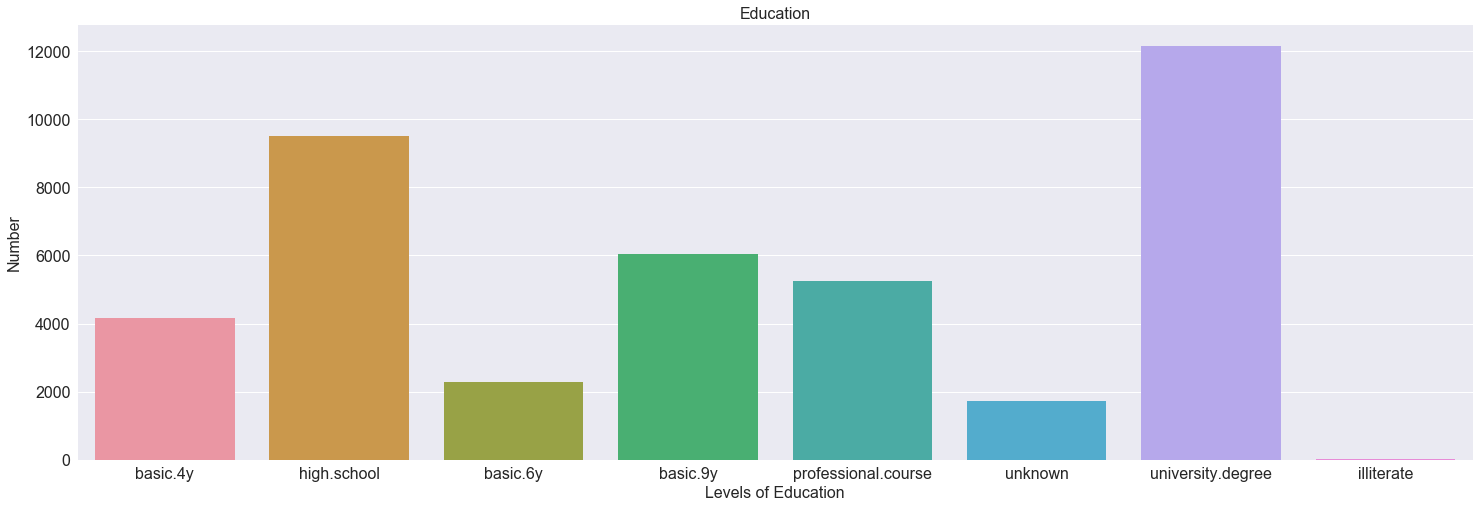

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = df[cols_cat])
ax.set_xlabel('Levels of Education', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

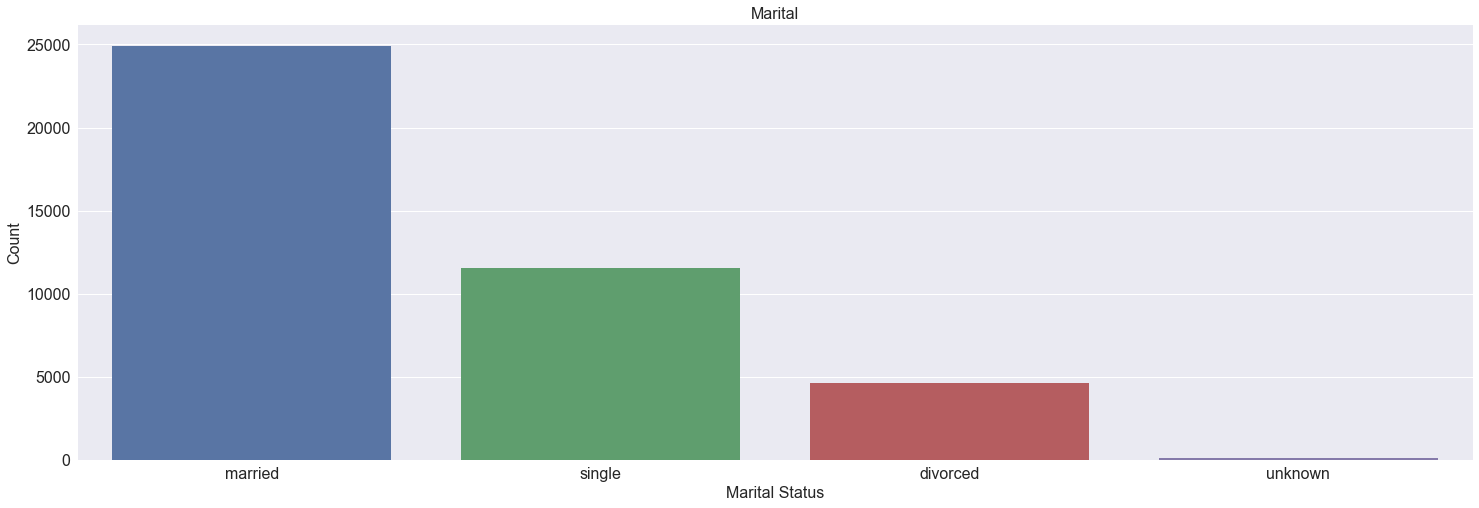

In [157]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = df[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

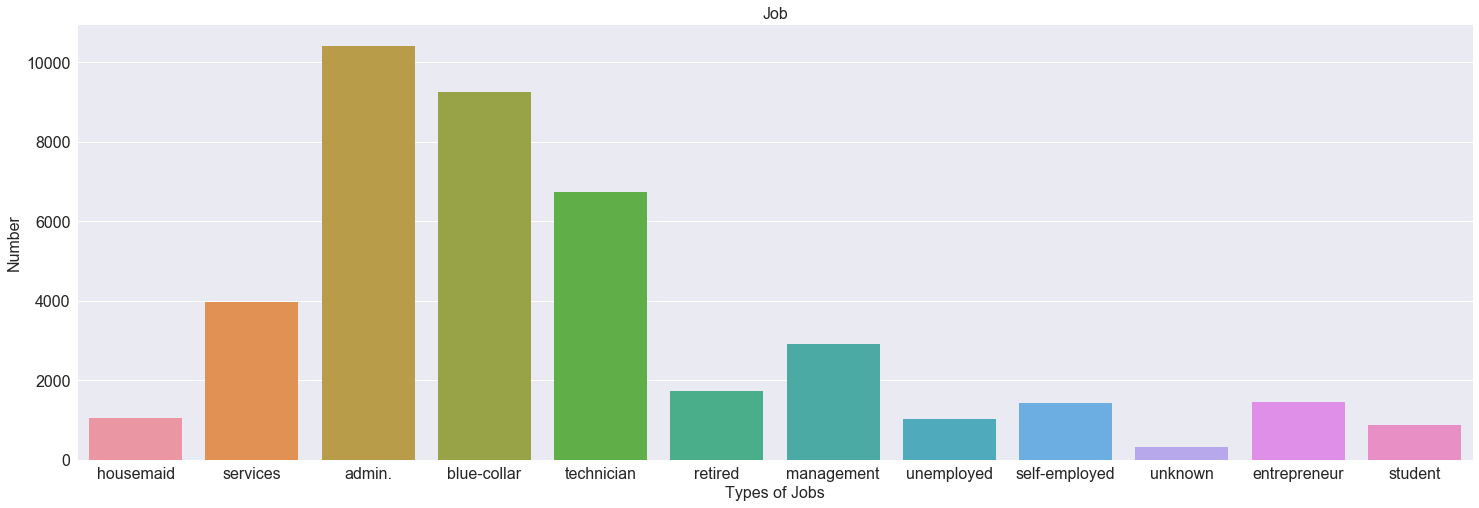

In [158]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = df[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

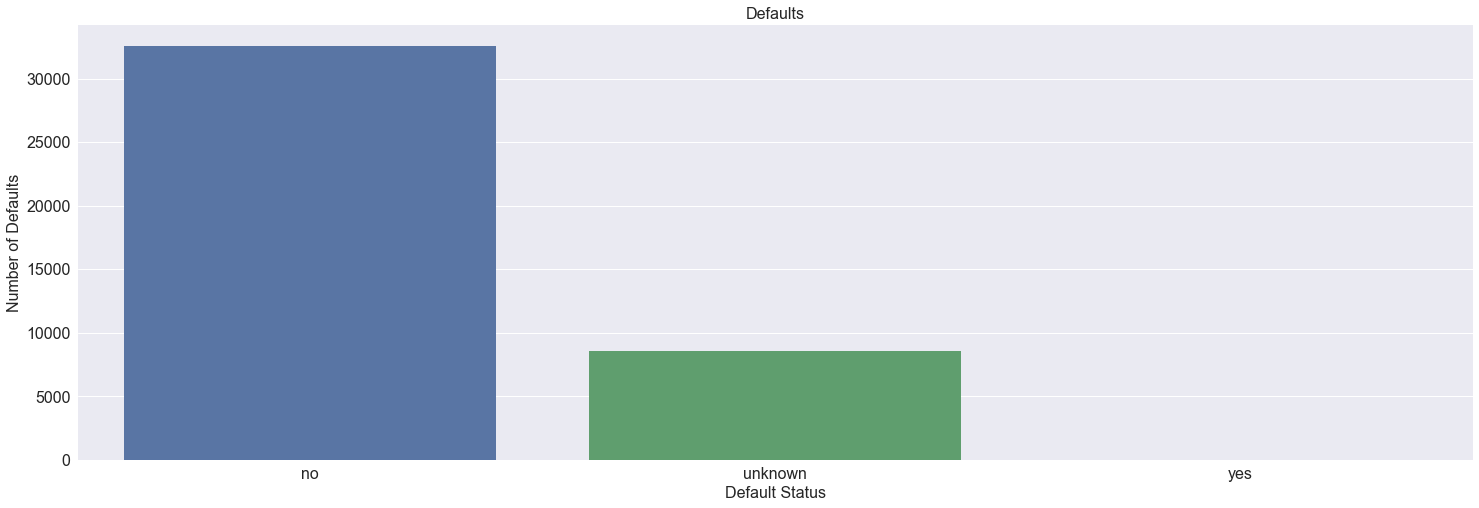

In [159]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'default', data = df[cols_cat])
ax.set_xlabel('Default Status', fontsize=16)
ax.set_ylabel('Number of Defaults', fontsize=16)
ax.set_title('Defaults', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

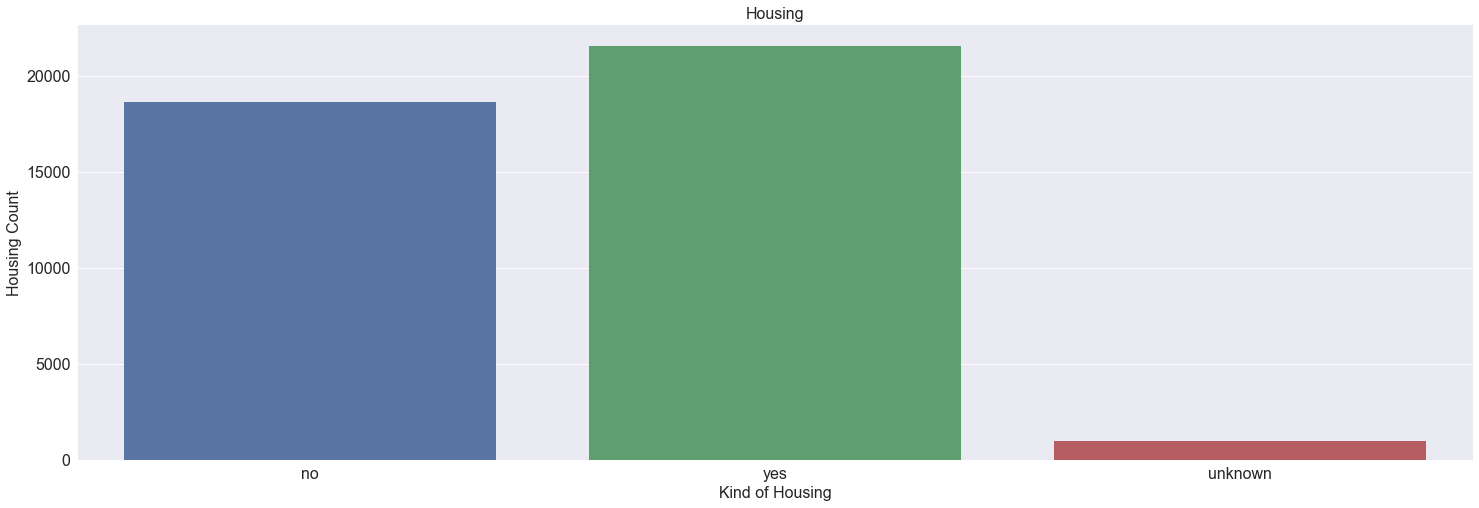

In [160]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'housing', data = df[cols_cat])
ax.set_xlabel('Kind of Housing', fontsize=16)
ax.set_ylabel('Housing Count', fontsize=16)
ax.set_title('Housing', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

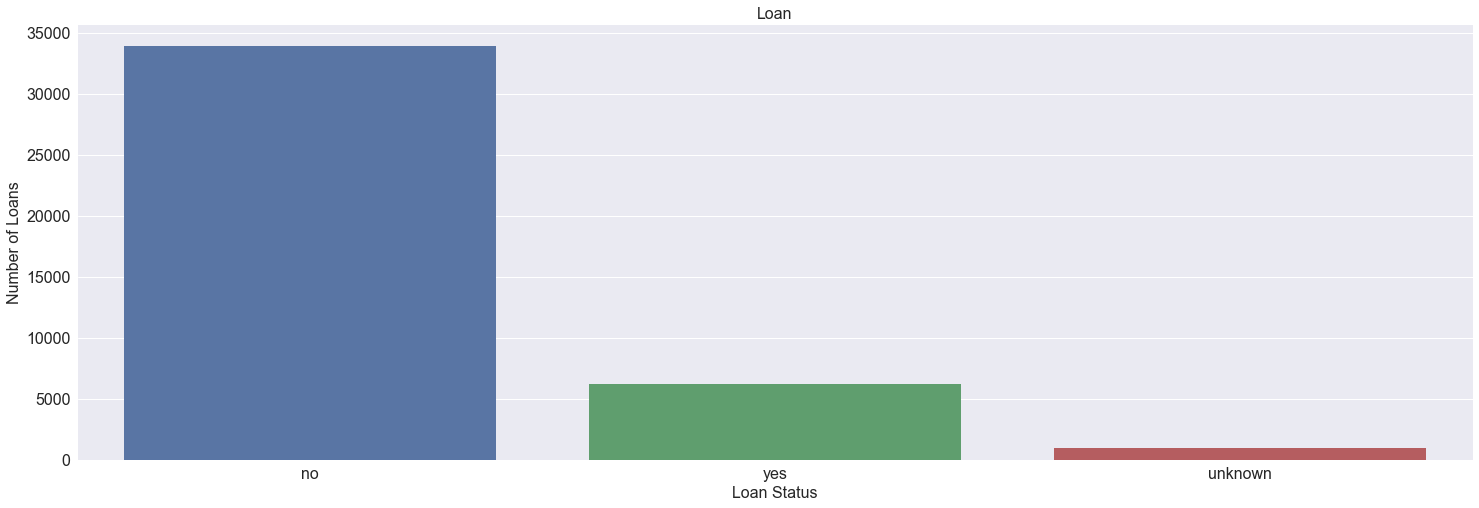

In [161]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'loan', data = df[cols_cat])
ax.set_xlabel('Loan Status', fontsize=16)
ax.set_ylabel('Number of Loans', fontsize=16)
ax.set_title('Loan', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

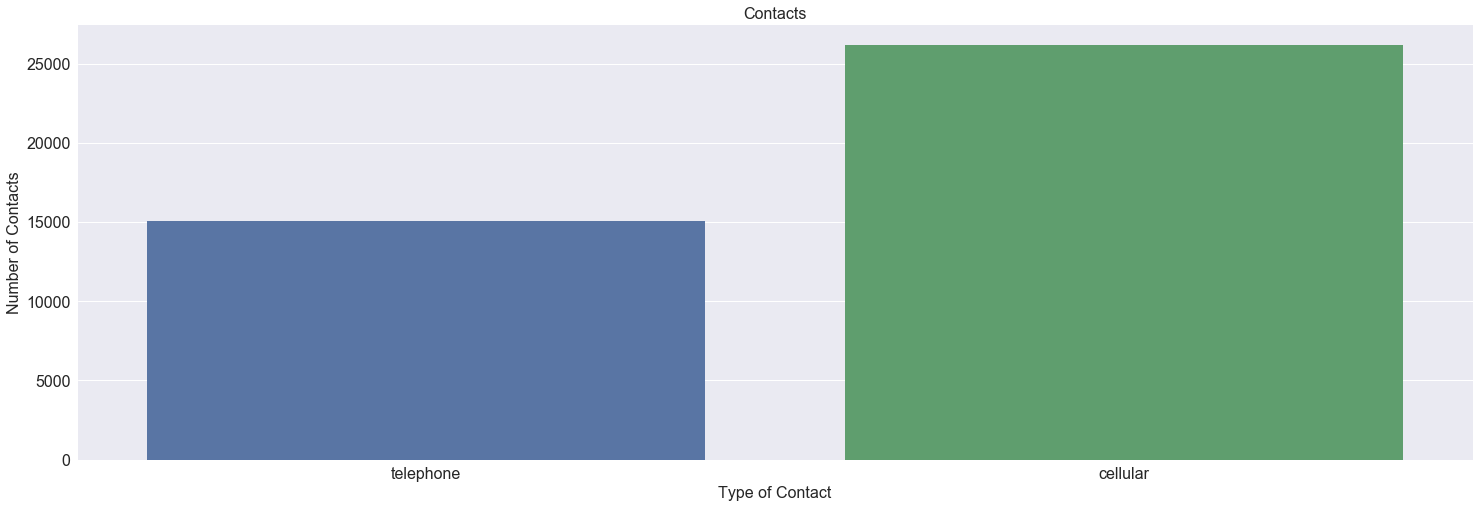

In [162]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'contact', data = df[cols_cat])
ax.set_xlabel('Type of Contact', fontsize=16)
ax.set_ylabel('Number of Contacts', fontsize=16)
ax.set_title('Contacts', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

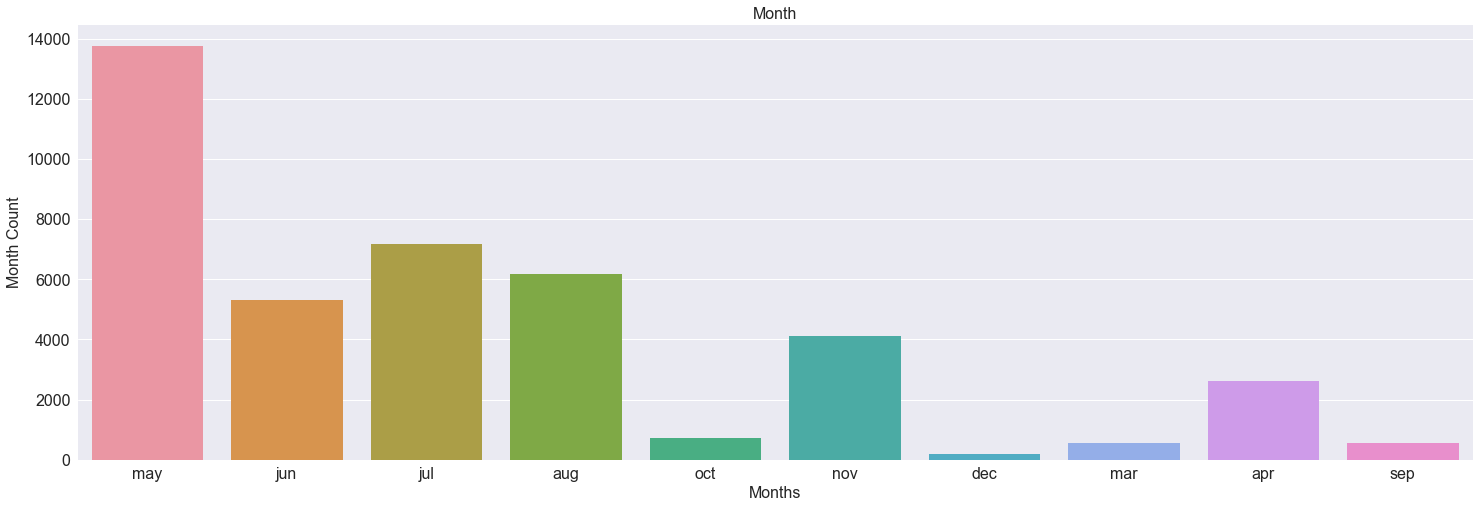

In [163]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'month', data = df[cols_cat])
ax.set_xlabel('Months', fontsize=16)
ax.set_ylabel('Month Count', fontsize=16)
ax.set_title('Month', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

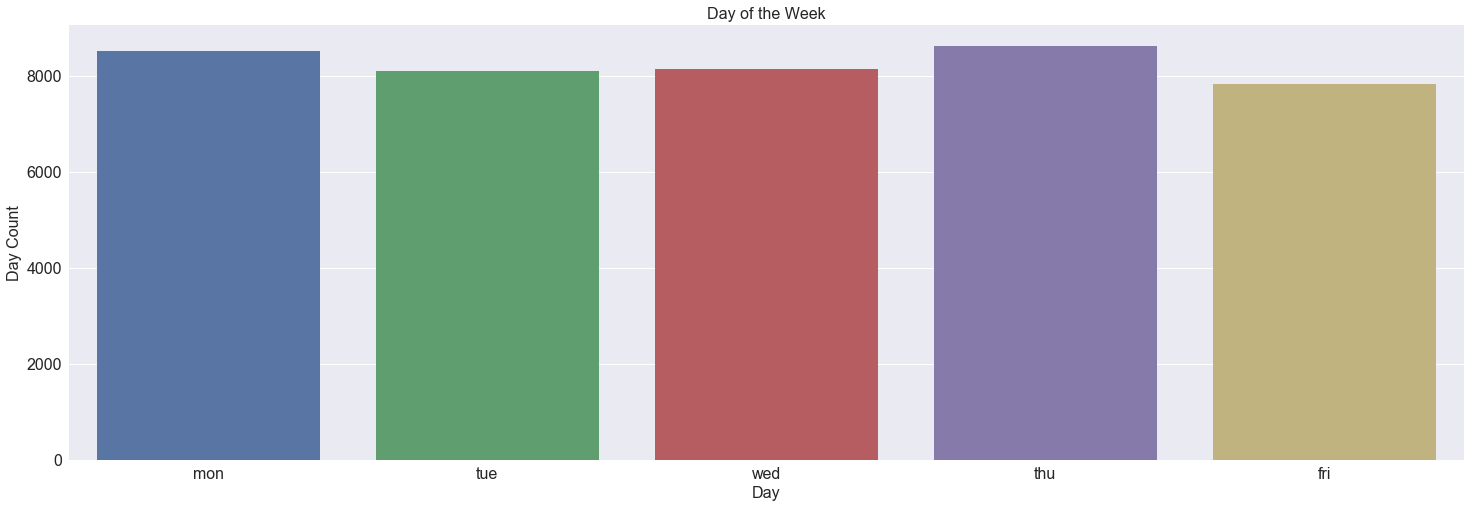

In [164]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'day_of_week', data = df[cols_cat])
ax.set_xlabel('Day', fontsize=16)
ax.set_ylabel('Day Count', fontsize=16)
ax.set_title('Day of the Week', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

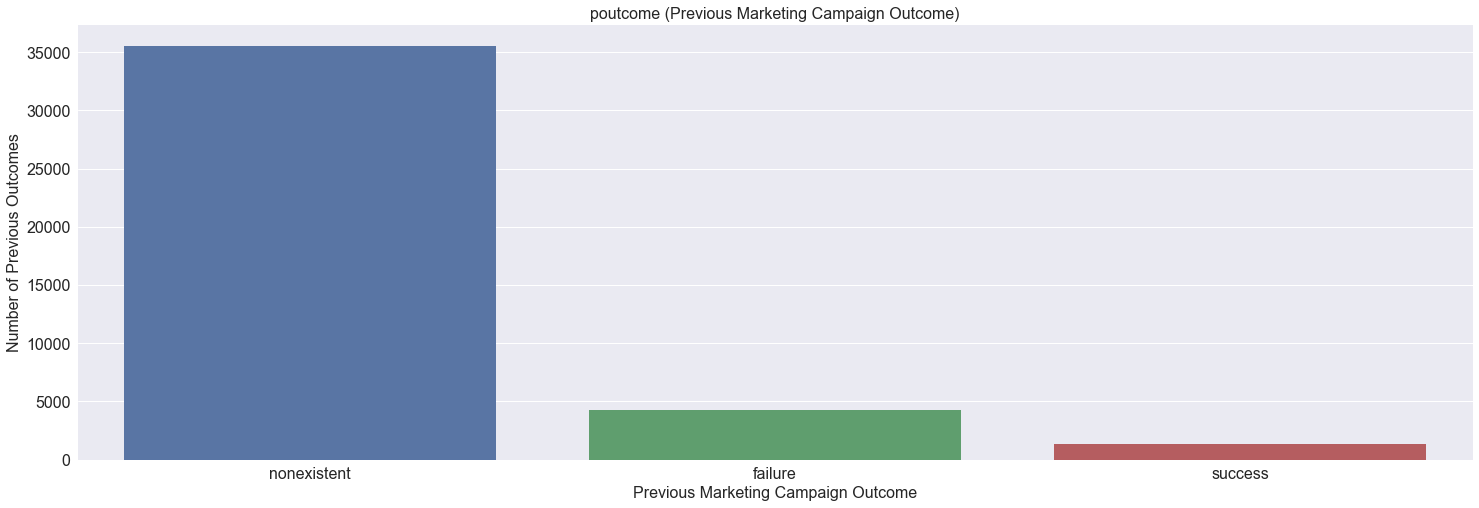

In [165]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = df[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

In order to add the one-hot encoding columns to the dataframe, we use the concat function. axis = 1 is used to add the columns. 

In [166]:
df = pd.concat([df,cols_new_cat], axis = 1)

In [167]:
cols_all_cat=list(cols_new_cat.columns)

In [168]:
df[cols_all_cat]

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
9,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


I removed Campaign column from the dataset because there are so many unique values and it does not make any lasting effect in the dataset for affecting the outcome of a person opening a bank term deposit

In [169]:
cols_new_num = ['pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','nr.employed','is_less_than_or_equal_to_35','is_greater_than_35']
df[cols_new_num].head(12)

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,is_less_than_or_equal_to_35,is_greater_than_35
0,999,0,1.1,93.994,-36.4,5191.0,0,1
1,999,0,1.1,93.994,-36.4,5191.0,0,1
2,999,0,1.1,93.994,-36.4,5191.0,0,1
3,999,0,1.1,93.994,-36.4,5191.0,0,1
4,999,0,1.1,93.994,-36.4,5191.0,0,1
5,999,0,1.1,93.994,-36.4,5191.0,0,1
6,999,0,1.1,93.994,-36.4,5191.0,0,1
7,999,0,1.1,93.994,-36.4,5191.0,0,1
8,999,0,1.1,93.994,-36.4,5191.0,1,0
9,999,0,1.1,93.994,-36.4,5191.0,1,0


### Summary of Features Engineering 

In [170]:
print('Total number of features:', len(cols_all_cat+cols_new_num))
print('Numerical Features:',len(cols_new_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 51
Numerical Features: 8
Categorical Features: 43


In [171]:
df[cols_new_num].head()

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,is_less_than_or_equal_to_35,is_greater_than_35
0,999,0,1.1,93.994,-36.4,5191.0,0,1
1,999,0,1.1,93.994,-36.4,5191.0,0,1
2,999,0,1.1,93.994,-36.4,5191.0,0,1
3,999,0,1.1,93.994,-36.4,5191.0,0,1
4,999,0,1.1,93.994,-36.4,5191.0,0,1


Data check for missing values

In [172]:
df[cols_new_num+cols_all_cat].isnull().sum().sort_values(ascending = False)

poutcome_success                 0
job_retired                      0
education_basic.6y               0
marital_unknown                  0
marital_single                   0
marital_married                  0
job_unknown                      0
job_unemployed                   0
job_technician                   0
job_student                      0
job_services                     0
job_self-employed                0
job_management                   0
education_high.school            0
job_housemaid                    0
job_entrepreneur                 0
job_blue-collar                  0
is_greater_than_35               0
is_less_than_or_equal_to_35      0
nr.employed                      0
cons.conf.idx                    0
cons.price.idx                   0
emp.var.rate                     0
previous                         0
education_basic.9y               0
education_illiterate             0
poutcome_nonexistent             0
month_jul                        0
day_of_week_wed     

Good to go! No empty cells! Also, I created a new dataframe below, which includes the columns of interest. 

In [173]:
cols_input = cols_new_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [174]:
cols_input

['pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'is_less_than_or_equal_to_35',
 'is_greater_than_35',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [175]:
len(cols_input)

51

In [176]:
df_data.head(6)

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,is_less_than_or_equal_to_35,is_greater_than_35,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,999,0,1.1,93.994,-36.4,5191.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,999,0,1.1,93.994,-36.4,5191.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,999,0,1.1,93.994,-36.4,5191.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,999,0,1.1,93.994,-36.4,5191.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,999,0,1.1,93.994,-36.4,5191.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5,999,0,1.1,93.994,-36.4,5191.0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


## Building Training, Validation & Test Samples

So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts:

Training samples: these are samples from the data set used to train the model. It can be 70% of the data.

Validation samples: these are samples used to validate or make decisions from the model. It can be 15% of the data.

Test samples: these are samples used to measure the accuracy or performace of the model. It can be 15% of the data.

In this project, we will split into 70% train, 15% validation, and 15% test.

The first thing I like to do is to shuffle the samples using sample in case there was some order (e.g. all positive samples on top). Here n is the number of samples. random_state is just specified so the project is reproducable. You wouldn't need random_state necessarily in your own projects.

The training (df_train_all), validation (df_valid) and test (df_test) set were created below.

Shuffle the samples

In [177]:
#shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

30% of the validation and test samples:

In [178]:
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


Split into test and validation samples by 50% which makes 15% of test and 15% of validation samples.

In [179]:
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

Use the rest of the data for the training samples

In [180]:
#use the rest of the data as training data
df_train_all=df_data.drop(df_valid_test.index)

In [181]:
# check the prevalence of each 
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 6178):0.114
Valid prevalence(n = 6178):0.113
Train all prevalence(n = 28832):0.112


We need to balance the data set because if we use the training data as the predictive model the accuracy is going to be very high because we haven't caught any of the y output which states whether a person will buy a term deposit or not. There are more negatives than positive so the predictive models assigns negatives to much of the samples. Creating a balance sheet will allow 50% of the samples to be both positive and negative.

In [182]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Train balanced prevalence(n = 6472):0.500


All 4 dataframes were saved intto csv and the cols_input

In [183]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

Saving cols_input too with a package called pickle

In [184]:
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Any missing values were filled with the mean value

In [185]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

The mean value from the training data:

In [186]:
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

Loaded the means

In [187]:
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,pdays,962.352456
1,previous,0.173037
2,emp.var.rate,0.078278
3,cons.price.idx,93.574366
4,cons.conf.idx,-40.504814


In [188]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

In [189]:
# create the X and y matrices
X_train = df_train[cols_input].values
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (28832, 51)
Training shapes: (6472, 51) (6472,)
Validation shapes: (6178, 51) (6178,)


Created a scalar, saved it, and scaled the X matrices

In [190]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [191]:
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [192]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [193]:
# transform our data matrices
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

## Model Selection 

This section allows us to test various  machine learning algorithm to see how our independent variables accurately predit our dependent y output variable. We will then select the best model based on performance on the validation set.
We will utilize the following functions to evaluate the performance of the model.

In [194]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [195]:
thresh = 0.5

## Model Selection: baseline models

In this section, we will first compare the performance of the following 7 machine learning models using default hyperparameters:

-K-nearest neighbors

-Logistic regression

-Stochastic gradient descent

-Naive Bayes

-Decision tree

-Random forest

-Gradient boosting classifier


### K nearest neighbors (KNN)

K Nearest Neighbors looks at the k closest datapoints and probability sample that has positive labels. It is easy to implement, and you don't need an assumption for the data structure. KNN is also good for multivariate analysis.

Training and evaluating KNN performance:

In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [197]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.794
accuracy:0.727
recall:0.592
precision:0.811
specificity:0.851
prevalence:0.500
 
Validation:
AUC:0.780
accuracy:0.832
recall:0.599
precision:0.356
specificity:0.850
prevalence:0.113
 


Using K Nearest Neighbors and dividing the data into training and validation samples, I was able to get an AUC of 79.4% which catches 59.2% of potential customers using a threshold of 0.5 for the training set, which is good.

### Logistic Regression

Logsitic regression uses a line (Sigmoid function) in the form of an "S" to predict if the dependent variable is true or false based on the independent variables. The "S-shaped" curve (on the line graph) will show the probability of the dependent variable occuring based on where the points of the independent variables lands on the curve. In this case, the output (y) is predicted by the numerical and categorical variables defined as "x" such as age, education and so on. Logistic regresssion is best used for classifying samples.

Training and evaluating the logistic regression performance:

In [198]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.796
accuracy:0.745
recall:0.635
precision:0.815
specificity:0.855
prevalence:0.500
 
Validation:
AUC:0.795
accuracy:0.829
recall:0.637
precision:0.357
specificity:0.854
prevalence:0.113
 


### Stochastic Gradient Descent

Stochastic Gradient Descent analyzes various sections of the data instead of the data as a whole and predicts the output using the independent variables. Stochastic Gradient Descent is faster than logistic regression in the sense that it doesn't run the whole dataset but instead looks at different parts of the dataset.

Training and evaluating Stochastic Gradient Descent model performance:

In [200]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\Users\emekaefidi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [201]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descent')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descent
Training:
AUC:0.792
accuracy:0.739
recall:0.639
precision:0.800
specificity:0.840
prevalence:0.500
 
Validation:
AUC:0.795
accuracy:0.818
recall:0.639
precision:0.339
specificity:0.841
prevalence:0.113
 


### Naive Bayes

Naive Bayes assumes that all variables in the dataset are independent of each other. Meaning that there are no dependent variables or output. This algorithm uses Bayes rule which calculated the probability of an event related to previous knowledge of the variables converning the event. This won't really work in this case since we have an output of the bank customers who will get a bank deposit. This process is better for tasks such as image processing.

Training and evaluating Naive Bayes model performance:

In [202]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None)

In [203]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.761
accuracy:0.681
recall:0.444
precision:0.845
specificity:0.918
prevalence:0.500
 
Validation:
AUC:0.770
accuracy:0.864
recall:0.459
precision:0.409
specificity:0.915
prevalence:0.113
 


### Decision Tree Classifier

Decision trees works through the data to decide if one action occurs, what will then be the result of a "yes" and a "no". It works each data making the decision of which path to take based on the answer. Because of this decision making process, this algorithm has no assumptions about the structure of the data, but instead decides on the path to take through each decision the algorithm performs.

Training and evaluating Decision Tree model performance:

In [204]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [205]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.852
accuracy:0.779
recall:0.651
precision:0.876
specificity:0.905
prevalence:0.500
 
Validation:
AUC:0.758
accuracy:0.827
recall:0.612
precision:0.349
specificity:0.849
prevalence:0.113
 


### Random Forest

Random forest works like a decision tree algorithm but it performs various decision tree analysis on the dataset as a whole. That is, it is the bigger version of the decision tree; a forest is bigger than a tree, you can think of it that way. Random forest takes random samples of trees and it works faster than the decision tree algorithm. 

Training and evaluating Random Forest model performance:

In [206]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [207]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.805
accuracy:0.742
recall:0.642
precision:0.803
specificity:0.843
prevalence:0.500
 
Validation:
AUC:0.791
accuracy:0.820
recall:0.645
precision:0.343
specificity:0.843
prevalence:0.113
 


### Gradient Boosting Classifier

Boosting is a technique that builds a new decision tree algorithm that focuses on the errors on the dataset to fix them. This learns the whole model in other to fix it and improve the prediction of the model. Aside from being related to decision trees, it also relates to gradient descent algorithm as the name signifies. Gradient boosting analyzes different parts of the dataset and builds trees that focuses and corrects those errors. The XGBoost library is also the determining factor in winning a lot of Kaggle data science competitions.

Training and evaluating Gradient Boosting model performance:

In [208]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [209]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.871
accuracy:0.788
recall:0.699
precision:0.851
specificity:0.878
prevalence:0.500
 
Validation:
AUC:0.769
accuracy:0.777
recall:0.648
precision:0.285
specificity:0.793
prevalence:0.113
 


## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn - making a dataframe with the results of all the baseline models and plot the outcomes. In this project, we will utilize the Area under the ROC curve (AUC) to evaluate the best model. This is a good data science performance metric for picking the best model since it captures the trade off between the true positive and false positive and does not require selecting a threshold.

In [210]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

I picked AUC (area under the ROC curve) as a performance indicator. The reason I chose this over other indicators such as precision and accuracy is that it measures the relationshio between true positives and false positives in our data in order to derive a score that depicts that. Also, AUC is widely used and an easier metric to compare many models with.

All the algorithms have pretty much the same AUC, but the ones that stood out our decision tree (DT) and gradient boosting (GB). I would choose gradient boosting as the best metric to use because it has a higher auc (0.874) than the other algorithms. At a threshold of 0.5, an auc of 0.874 is good as it signifies that it is more than just a random guess towards a positive class and it is close to 1 which is perfect.

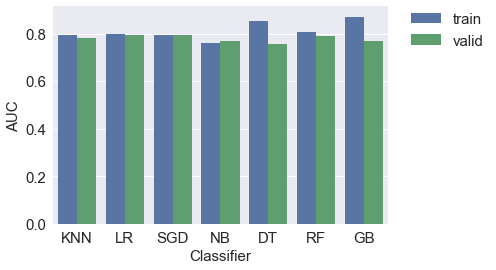

In [212]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

## Learning Curves

We can diagnose how our models are doing by plotting a learning curve. In this section, we will make use of the learning curve code from scikit-learn’s website with a small change of plotting the AUC instead of accuracy. Gradient Descent has the best AUC score (0.796) for the validation model and the learning curve for the model will be displayed below.

In [213]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

The Stochastic Gradient Descent model with max_depth = 20, resulting in high variance

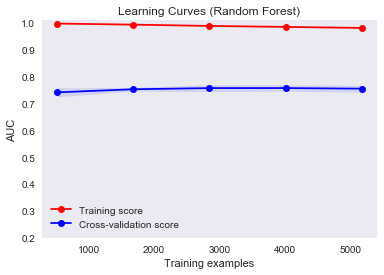

In [214]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 20, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

### Variance and Bias

In the case of random forest, we can see the model has high variance because the training and cross-validation scores show data points which are very spread out from one another. High variance would cause an algorithm to model the noise in the training set (overfitting).

Depending on the learning curve, there are a few strategies we can employ to improve the models

High Variance:
- Add more samples
- Add regularization
- Reduce number of features
- Decrease model complexity
- Add better features
- Change model architecture

High Bias:
- Add new features
- Increase model complexity
- Reduce regularization
- Change model architecture

## Feature Importance

This section focuses on the importance of the different features generated and in the dataframe. Depending on the importance score of some features, we can focus on higher importance scores to see if the AUC score (performance) of the model will improve.

### Logistic Regression

In [215]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [216]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [217]:
feature_importances

,importance
cons.price.idx,1.084834
nr.employed,0.551311
month_mar,0.175752
cons.conf.idx,0.174273
month_aug,0.154882
poutcome_success,0.142384
job_retired,0.124313
month_dec,0.070470
education_university.degree,0.069936
poutcome_nonexistent,0.069117


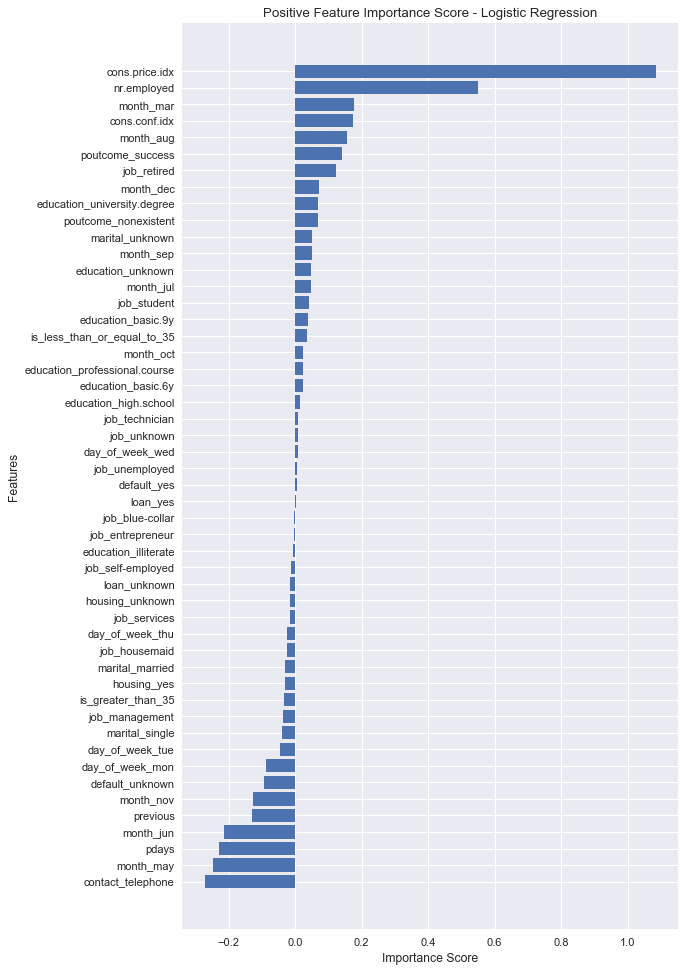

In [218]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

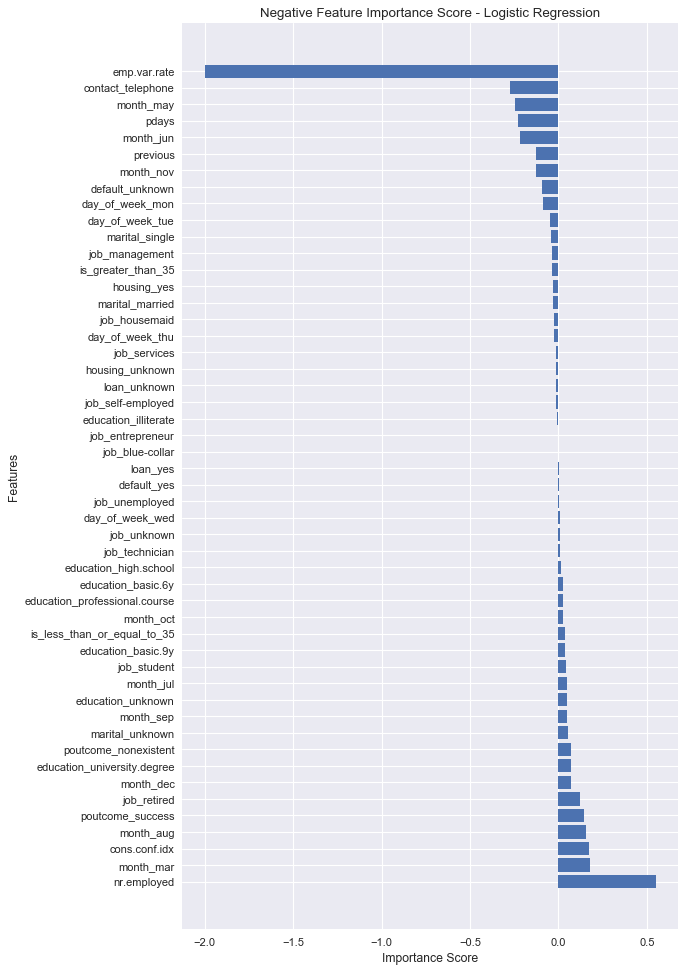

In [219]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In the case of high variance, one strategy is to reduce the number of variables to minimize overfitting. After this analyis, you could use the top N positive and negative features or the top N important random forest features. You might need to adjust N so that your performance does not drop drastically. For example, only using the top feature will likely drop the performance by a lot. Another strategy that you could use to reduce the number of variables is called PCA (principle component analysis). This is also implemented in scikit-learn if you are interested.

I realized the features that have more positive impact on the predictive outcomes of the model. nr.employed, mon_mar, and cons.price are very crucial as their importance score is higher than other nummerical variables. emp.var.rate has a high negative importance score. One way to look at it is I can remove the other columns from my dataset and maybe I can achieve a higher auc score.

### Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [221]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.299850
emp.var.rate,0.155873
cons.price.idx,0.111641
contact_telephone,0.068036
cons.conf.idx,0.067323


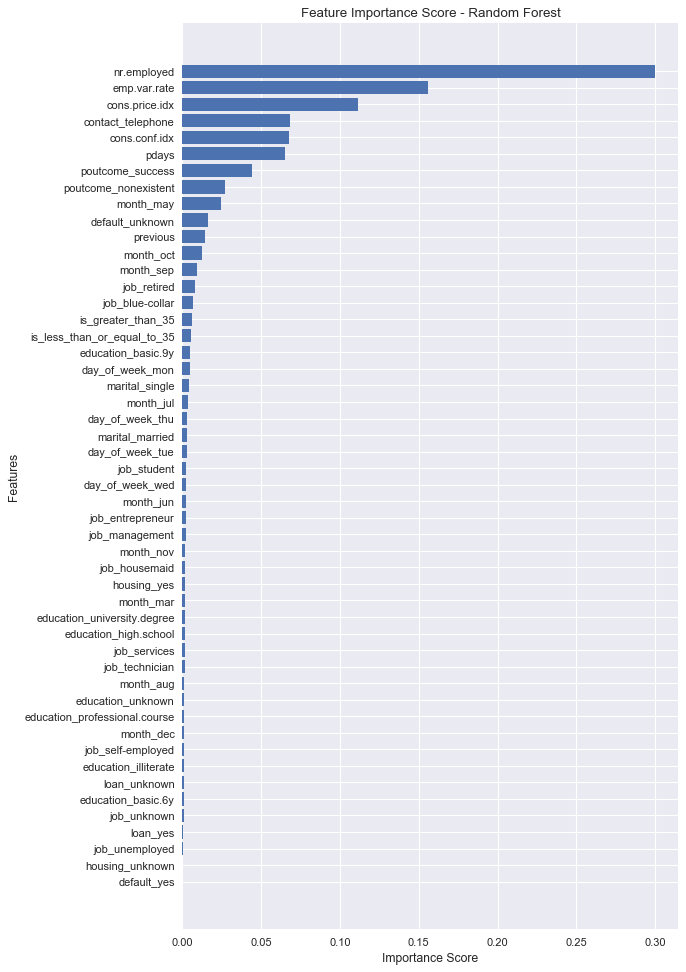

In [222]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

### Other Algorithm Feature Importance Scores

### Gradient Boosting Classifier

In [223]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [224]:
feature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
cons.conf.idx,0.087239
cons.price.idx,0.076716
education_basic.6y,0.037591
previous,0.034851
day_of_week_mon,0.034378


I realized the features that have more positive impact on the predictive outcomes of the model: cons.price.idx, and nr.employed are very crucial as their importance score is higher than other numerical variables. One way to look at it is I can remove the other columns from my dataset and maybe I can achieve a higher auc score.

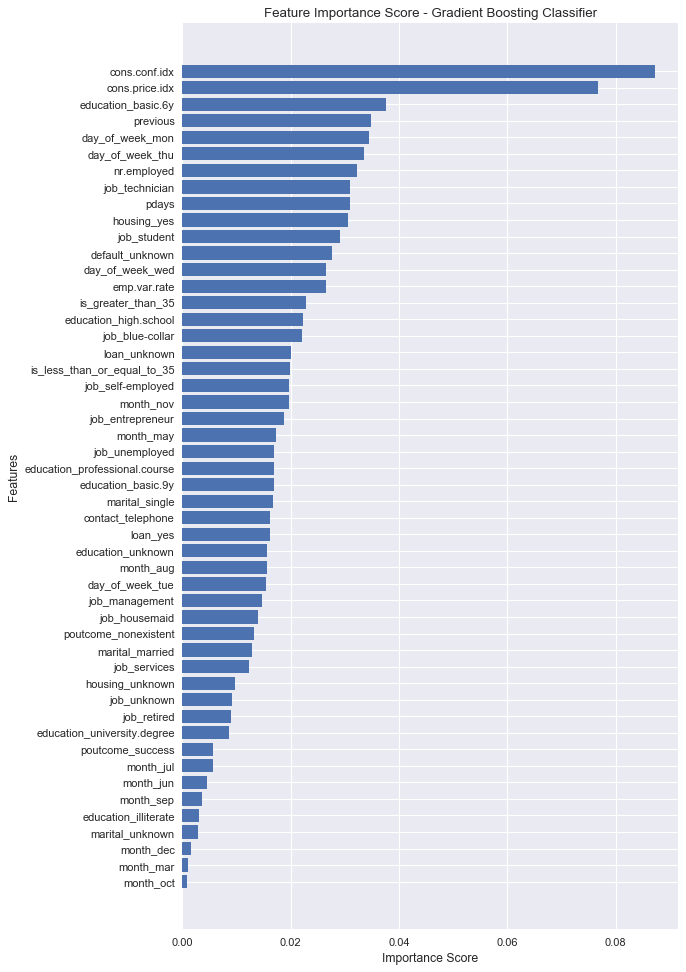

In [225]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Gradient Boosting Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

### Decision Trees

In [226]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [227]:
feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
nr.employed,0.505326
cons.conf.idx,0.151803
pdays,0.033970
month_oct,0.023826
default_unknown,0.023109


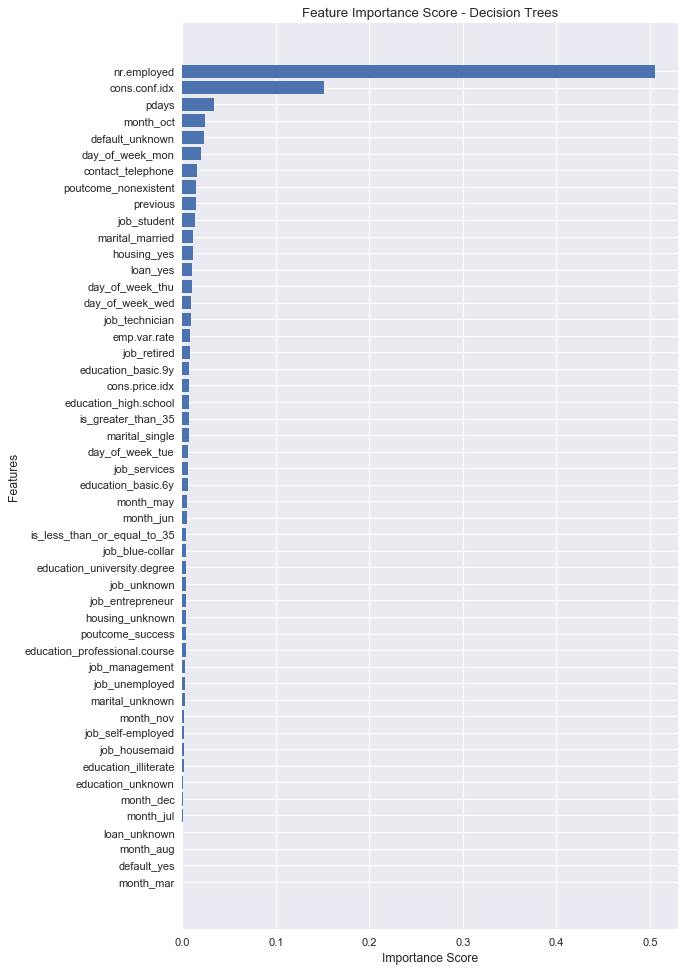

In [228]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Decision Trees')
plt.yticks(ylocs, feature_labels)
plt.show()

After looking at the importance of each features, I tried removing some columns with a lower importance from the model to see if my AUC will increase but it only decreased. Therefore, I'm leaving my features as it is.

## Hyperparameter tuning

A hyperparameter is a tool used in machine learning in order to estimate the model parameters (used in tuning a predictive modeling problem).  Hyperparameters are used in various machine learning algorithms. 

In [229]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

n_estimators is a hyperparameter in the RandomForestClassifier that depending on the numbers of estimators entered the model can be overfitted, good compromise or underfitted. n_estimators is used for fine tuning the models in order to fit the training data. max_depth is also another hyperparameter; it controls the depth of the machine learning algorithm model.

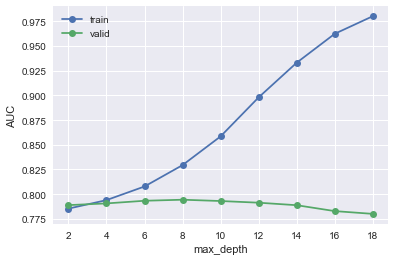

In [230]:
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

Using RandomizedSearchCV to optimize a few of the baseline models. GradientBoosting Classifier may take a while so one might need to adjust the number of iterations or specific parameters. If this takes too long on the computer, one can take it out.

In [231]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [232]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [233]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [234]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)

In [235]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.3min finished


84.10201811790466


See the best parameters

In [236]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 8,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [237]:
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.805
Validation AUC:0.791
Optimized Random Forest
Training AUC:0.849
Validation AUC:0.793


Optimized SGDClassifier

In [238]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

C:\Users\emekaefidi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [239]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

21.95735502243042


In [240]:
sgdc_random.best_params_

{'penalty': 'none', 'max_iter': 200, 'alpha': 0.003}

In [241]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.792
Validation AUC:0.795
Optimized sgdc
Training AUC:0.796
Validation AUC:0.795


Optimized Gradient Boosting Classifier

In [242]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [243]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

20.77126669883728


In [244]:
gbc_random.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

In [245]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.871
Validation AUC:0.769
Optimized gbc
Training AUC:0.806
Validation AUC:0.796


Analyzing the 3 results

In [246]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [247]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.794919
1,SGD,optimized,0.795173
2,RF,baseline,0.790568
3,RF,optimized,0.793309
4,GB,baseline,0.769200
5,GB,optimized,0.796168


Comparing the performance of the optimized models to the baseline models. 

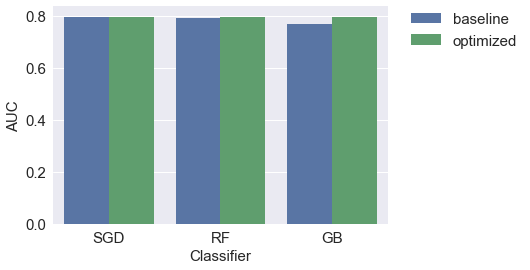

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Picking the best model

I picked Gradient Boosting optimized version as my best model because the optimized version has a higher auc metric than the baseline models of Stochastic Gradient Descent and Random Forest. Gradient Boosting's AUC score also tells me that most of my data are predicted positives which has a good chance of occuring and can be used to make strategic decisions for management.

In [249]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

Below is the evaluation of the performance of the best model on the training, validation and test sets. I also created an ROC curve.

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [251]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))


In [252]:
# load the data
df_train = pd.read_csv('df_train.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [253]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

Prediction possibilities

In [254]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

Evaluating performances

In [255]:
thresh = .5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.806
accuracy:0.747
recall:0.622
precision:0.828
specificity:0.871
prevalence:0.500
 
Validation:
AUC:0.796
accuracy:0.843
recall:0.631
precision:0.382
specificity:0.870
prevalence:0.113
 
Test:
AUC:0.791
accuracy:0.837
recall:0.591
precision:0.367
specificity:0.869
prevalence:0.114
 


### The ROC Curve

We can also create the We can also create the ROC curve for the 3 datasets as shown belowROC curve for the 3 datasets as shown below

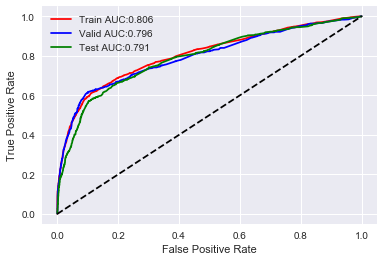

In [256]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Our data shows that the results for the training, validation and testing data sets are skewed towards the true positive rate and above the treshold of 0.5 which is great because for example the test AUC of 0.791 means that the gradient boosting model has a performance of 79.1%.

In [257]:
df_data

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,is_less_than_or_equal_to_35,is_greater_than_35,job_blue-collar,job_entrepreneur,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,999,1,-1.8,92.893,-46.2,5099.1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,999,0,1.1,93.994,-36.4,5191.0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,999,1,-1.8,92.893,-46.2,5099.1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,999,0,1.4,94.465,-41.8,5228.1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,999,0,1.4,93.918,-42.7,5228.1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,999,0,1.4,93.918,-42.7,5228.1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,999,0,1.1,93.994,-36.4,5191.0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
7,999,0,1.4,93.444,-36.1,5228.1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8,999,0,1.4,94.465,-41.8,5228.1,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
9,999,0,1.4,93.918,-42.7,5228.1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


# Conclusion

Through this project, we created a machine learning model that is able to predict how likely clients will subscribe to a bank term deposit. The best model was gradient boosting classifier with optimized hyperparameters. Our AUC for the test is 0.791 - the model's performance is 79.1%

A precision of 0.37 divided by a prevalence of 0.11 gives us 3.36, which means that the machine learning model helps us 3.4 times better than randomly guessing. The model was able to catch 59% of customers that will subscribe to a term deposit

We should focus on targeting customers with high cons.price.idx (consumer price index) and nr.employed (no. of employees) as they are high importance features for the model and business 

Therefore, we save time and money knowing the characteristics of clients we should market to and that will lead to increased growth and revenue